In [672]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [673]:
def get_data():
    print("Fetching Data...")
    train = pd.read_csv("./data/pa2_train.csv", header = None)
    val = pd.read_csv("./data/pa2_valid.csv", header = None)
    test = pd.read_csv("./data/pa2_test_no_label.csv", header = None)
    return train,val,test

def data_prep(df):
    print("Preprocessing...")
    df.loc[df[0] == 5,0] = -1
    df.loc[df[0] == 3,0] = 1
    
    return df

def add_bias(df):
    data = pd.DataFrame(np.ones(len(df)), columns=["dummy"])
    df = pd.concat([data,df],axis=1).values
    return df
    
def seperate(df):
    #add bias
    data = pd.DataFrame(np.ones(len(df)), columns=["dummy"])
    y = df.iloc[:,0].values
    x = df.iloc[:,1:]
    x = pd.concat([data,x],axis=1).values
    print("Data preperation complete")
    return x,y
    
def plot_accuracy(train_acc,val_acc,title):
    plt.figure(figsize=(10,7))
    plt.plot(range(1,16),train_acc, marker = 'o', label = "Training accuracy", color = "red")
    plt.plot(range(1,16),val_acc,  marker = 'o', label = "Validation accuracy", color = "blue")
    plt.legend(loc = "best")
    plt.title(title, fontsize = 20)
    plt.xlabel("Iteration", fontsize = 12)
    plt.ylabel("Accuracy \nMax Training = " + str(max(train_acc)) + 
               "\nMax Validation = " + str(max(val_acc)), fontsize = 12)
    plt.savefig("./plot/"+title+".png")
    plt.show()
    
def kernel_plot(p, best_val_acc, title):
    plt.figure(figsize=(10,7))
    plt.plot(p, best_val_acc, marker = 'o', color = 'g')
    plt.title(title, fontsize = 20)
    plt.ylabel("Accuracy\n"+"Max Validation = " + str(max(best_val_acc))+" (p=3)", fontsize = 15)
    plt.xlabel("p")
    plt.savefig("./plot/"+title+".png")
    plt.show() 
    
def create_accuracy_table(T_accuracy,V_accuracy,title):
    cnames = ["Iteration","Training Accuracy","Validation Accuracy"]
    table = pd.DataFrame(zip(range(1,16),T_accuracy,V_accuracy), columns = cnames)
    table.to_csv("./accuracy_tables/"+title+".csv", index = False)

# Part 1 (Online Perceptron)

In [674]:
def online_perceptron(x, y, x_val, y_val, x_test):
    
    """
    x: training features
    y: training response
    x_val: validation features
    y_val: validation response
    """
    
    #weight vector
    w = np.zeros(len(x[0]))
    #len(w) = 785
    
    #Checker to keep track of MAX validation accuracy
    temp = 0
    
    #Initialize iter and accuracy arrays
    n = 0
    val_accuracy = np.zeros(15)
    train_accuracy = np.zeros(15)

    print("Running Online Perceptron...")    
    while n<15:
    
        for i in range(0,len(y)):
            
            yhat = np.dot(w,x[i,:])
            
            if yhat*y[i] <= 0:
                w = w + (y[i]*x[i,:])
        
        #Predictions [Training, Validation, Test] 
        y_val_hat = np.sign(np.matmul(w,x_val.T))
        y_train_hat = np.sign(np.matmul(w,x.T))
        y_test_hat = np.sign(np.matmul(w,x_test.T))
        
        #Accuracy for each iteration
        val_accuracy[n] = ((sum(abs(y_val_hat + y_val)/2))*100)/len(y_val)
        train_accuracy[n] = ((sum(abs(y_train_hat + y)/2))*100)/len(y) 
        
        #Output Test predictions for MAX Validation accuracy
        if val_accuracy[n]>temp:
            np.savetxt("./predictions/oplabel.csv", y_test_hat.astype(int), delimiter=",")
            temp = val_accuracy[n]
            
        n += 1
    print("Done")
    return w,val_accuracy, train_accuracy

In [675]:
#Get Training, Validation and Test Data
train,val,test = get_data()

#Data Preprocessing
train = data_prep(train)
val = data_prep(val)

x,y = seperate(train)
x_val,y_val = seperate(val)

x_test = add_bias(test)

Fetching Data...
Preprocessing...
Preprocessing...
Data preperation complete
Data preperation complete


Running Online Perceptron...
Done


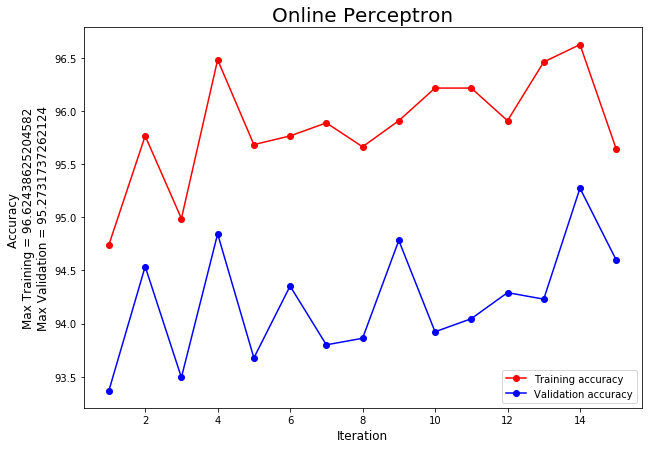

In [676]:
#Call online Perceptron
w,val_accuracy,train_accuracy = online_perceptron(x, y, x_val, y_val, x_test)

#Plot Accuracy Vs Iterations
plot_accuracy(train_accuracy,val_accuracy,"Online Perceptron")

#Store accuracy (Training and Validation)
create_accuracy_table(train_accuracy,val_accuracy,"Online_Perceptron")

# Part 2 (Averaged Perceptron)

In [677]:
def avg_perceptron(x, y, x_val, y_val, x_test):
    """
    x: training features
    y: training response
    x_val: validation features
    y_val: validation response
    """
    
    #Initialize weight vector & Aerage weight vector
    w = np.zeros(len(x[0]))
    w_avg = np.zeros(len(x[0]))
    
    #Counter
    s = 1
    
    #Checker to keep track of MAX validation accuracy
    temp = 0
    
    #Initialize iter and accuracy arrays
    n = 0
    val_accuracy = np.zeros(15)
    train_accuracy = np.zeros(15)
    
    print("Running averaged perceptron...")
    while n < 15:
                
        for i in range(len(y)):
            
            yhat = np.dot(x[i,:],w)
            if yhat*y[i] <= 0:
                w = w + (y[i]*x[i,:])
        
            w_avg = ((s*w_avg) + w) / (s+1)
            s = s+1

        #Predictions [Training, Validation, Test] 
        y_val_hat = np.sign(np.matmul(x_val,w_avg))
        y_train_hat = np.sign(np.matmul(x,w_avg))
        y_test_hat = np.sign(np.matmul(w_avg,x_test.T))
        
        #Accuracy for each iteration
        val_accuracy[n] = ((sum(abs(y_val_hat + y_val)/2))*100)/len(y_val)
        train_accuracy[n] = ((sum(abs(y_train_hat + y)/2))*100)/len(y)
        
        #Output Test predictions for MAX Validation accuracy
        if val_accuracy[n]>temp:
            np.savetxt("./predictions/aplabel.csv", y_test_hat.astype(int), delimiter=",")
            temp = val_accuracy[n]
        
        n += 1
    print("Done")
    return w_avg, val_accuracy, train_accuracy
    

Running averaged perceptron...
Done


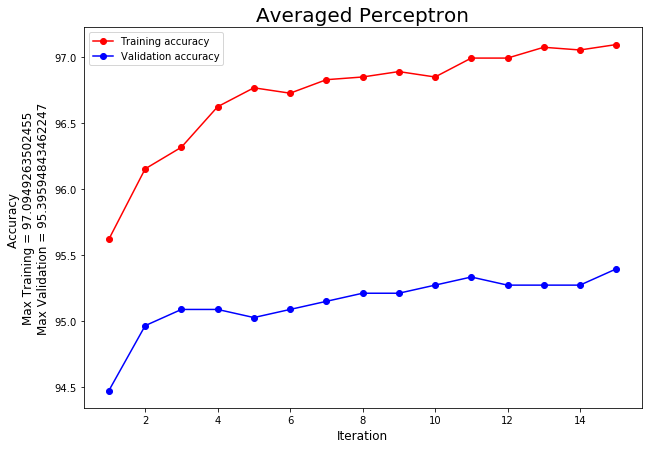

In [678]:
#Call online Perceptron
w_avg, val_accuracy_avg, train_accuracy_avg = avg_perceptron(x, y, x_val, y_val, x_test)

#Plot Accuracy Vs Iterations
plot_accuracy(train_accuracy_avg,val_accuracy_avg,"Averaged Perceptron")

#Store accuracy (Training and Validation)
create_accuracy_table(train_accuracy_avg,val_accuracy_avg,"Averaged_Perceptron")

# Part 3 (Kernalized Perceptron)

In [679]:
def gram_matrix(xi, xj, p):
    K = np.matmul(xi,xj.T)
    K = (1 + K)**p        
    return K

def k_perceptron(x, y, x_val, y_val, x_test, p):
    
    #Initialize alpha
    a = np.zeros(len(y))
    n = 0
    
    #Generate gram matrix
    K_train = gram_matrix(x,x,p)
    k_val = gram_matrix(x,x_val,p)
    k_test = gram_matrix(x,x_test,p)
    
    train_accuracy = np.zeros(15)
    
    #Initializing Prediction Vectors
    y_train_hat = np.zeros(len(y))
    y_val_hat = np.zeros(len(y_val))
    y_test_hat = np.zeros(len(x_test))
    
    #Checker to keep track of MAX validation accuracy
    temp = 0
    
    print(f"Running.... (degree: {p})")
    while n<15:
        #print(f"Iteration: {n+1}")
        for t in range(len(y)):
            prod = np.dot(K_train[:,t],y*a)
            if y[t]*prod <= 0:
                a[t] = a[t] + 1
        
        #Predictions [Training] 
        for t in range(len(y)):
            prod = np.dot(K_train[:,t],y*a)
            y_train_hat[t] = np.sign(prod)
        
        #Predictions [Validation] 
        for t in range(len(y_val)):
            prod = np.dot(k_val[:,t],y*a)
            y_val_hat[t] = np.sign(prod)
        
        #Predictions [Test] 
        for t in range(len(x_test)):
            prod = np.dot(k_test[:,t],y*a)
            y_test_hat[t] = np.sign(prod)
                
        #Accuracy for each iteration
        train_accuracy[n] = ((sum(abs(y_train_hat + y)/2))*100)/len(y)
        val_accuracy[n] = ((sum(abs(y_val_hat + y_val)/2))*100)/len(y_val)
        
        #Output Test predictions for MAX Validation accuracy
        if val_accuracy[n]>temp and p==3:
            np.savetxt("./predictions/kplabel.csv", y_test_hat.astype(int), delimiter=",")
            temp = val_accuracy[n]
        
        
        n += 1
    return a,val_accuracy,train_accuracy

Running.... (degree: 1)


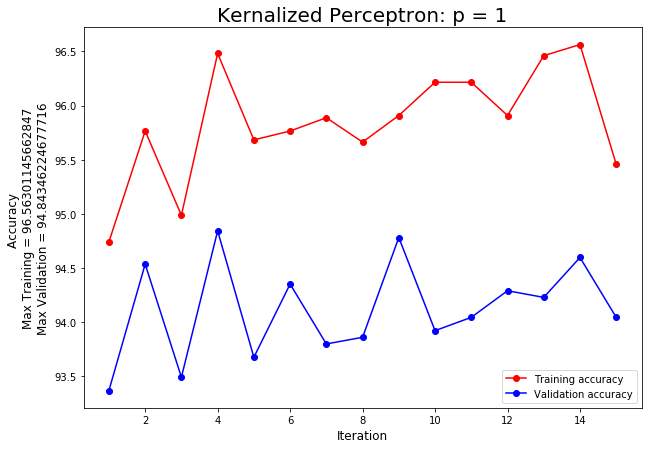

Running.... (degree: 2)


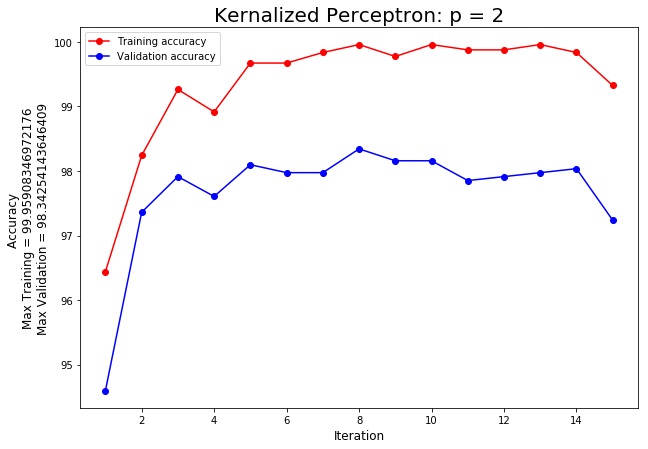

Running.... (degree: 3)
0
1
2
3


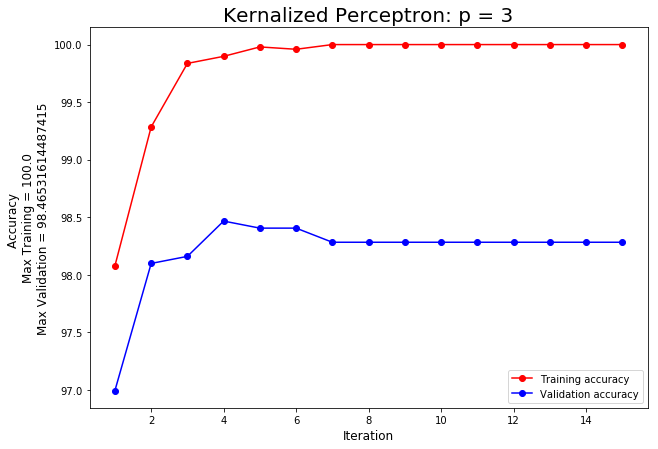

Running.... (degree: 4)


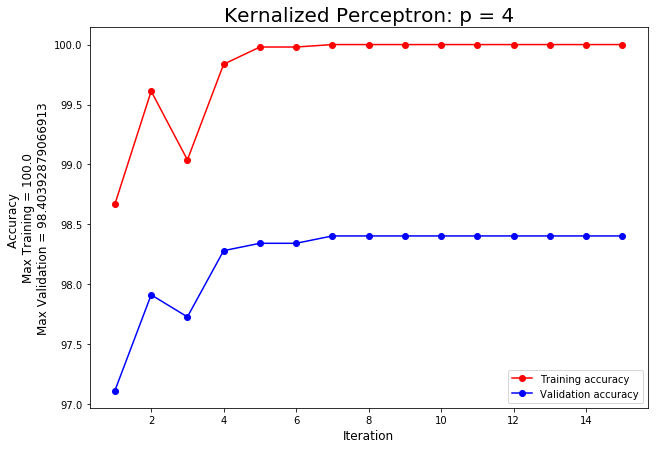

Running.... (degree: 5)


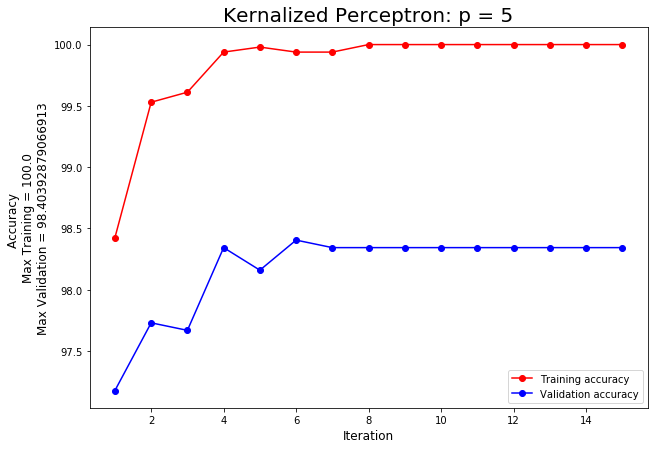

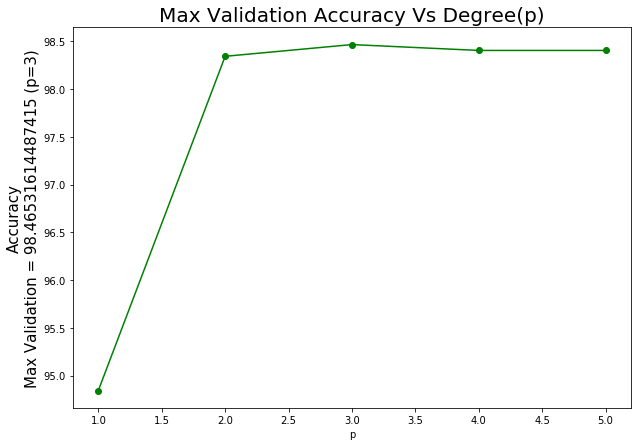

In [681]:
#Initialize p (degree)
p = [1,2,3,4,5]
#Initialize array to store Max validation acc for each p
best_val_acc = np.zeros(5)
print("Running Kernalized Perceptron")
for i in p:
    alpha,val_acc,train_acc = k_perceptron(x, y, x_val, y_val, x_test,i)
    plot_accuracy(train_acc,val_acc,"Kernalized Perceptron: p = " + str(i))
    best_val_acc[i-1] = max(val_acc)
    #Store accuracy (Training and Validation)
    create_accuracy_table(train_acc,val_acc,"Kernalized_Perceptron(p = "+str(i)+")")
    
#Plot Max Val_Accuracy Vs degrees    
kernel_plot(p,best_val_acc,"Max Validation Accuracy Vs Degree(p)")

In [682]:
#Store accuracy for different p (Validation)
cnames = ["p","Accuracy"]
table = pd.DataFrame(zip(p,best_val_acc), columns = cnames)
table.to_csv("./accuracy_tables/P_accuracy.csv", index = False)